**Imports and includes**

In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys
import glob

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment analysis function provided by Upasana**

In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Create list of all Baseline Users**

In [5]:
all_user_lists=[
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv",
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/MentionedBack_Users/Filtered_EnglishUsers_MentionedBackUsers_FINAL.csv",
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_DidnotMentionBackUsers.csv',
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_MentionBackedUsers.csv']

UserList = []
userPathDict = {}
for i in range(4):  
    df = pd.read_csv(all_user_lists[i])
    tempUserList = list(df['Users'])
    for j in range(len(tempUserList)):
        UserList.append(tempUserList[j])
        if (i == 0) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 1) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 2) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
        elif (i == 3) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
    

In [6]:
UserList = ['agimcorp',
 'ashedryden',
 'JustinGuarini',
 'joelpollak',
 'NewYorkHabitat',
 'agimcorp',
 'ashedryden',
 'JustinGuarini',
 'joelpollak',
 'NewYorkHabitat',
 'yay_yee',
 'moody',
 'ubykotex',
 'DrBobBullard',
 'conradhackett',
 'stranahan',
 'david8hughes',
 'BeladonnaRogers',
 'lauriecrosswell',
 'cristianafarias',
 'SooperMexican',
 'cjsnowdon',
 'jdelreal',
 'JBurtonXP',
 'vplus',
 'agimcorp',
 'ashedryden',
 'JustinGuarini',
 'joelpollak',
 'NewYorkHabitat',
 'yay_yee',
 'moody',
 'ubykotex',
 'DrBobBullard',
 'FL4TRUMPDOTCOM',
 'conradhackett',
 'stranahan',
 'david8hughes',
 'BeladonnaRogers',
 'lauriecrosswell',
 'cristianafarias',
 'SooperMexican',
 'cjsnowdon',
 'jdelreal',
 'JBurtonXP',
 'vplus',
 'leithfadel',
 'CHueyBurns',
 'jricole',
 'jennybethm',
 'mikd33',
 'SaveManning',
 'SenPatRoberts',
 'ShotsRangOut',
 'RufusKings1776',
 'MFinoshina_RT',
 'ScottPValentine',
 'foxnewsvideo',
 'ElaheIzadi',
 'POLITICOMag',
 'SteveMotley',
 'MightyMykell',
 'ShaneGoldmacher',
 'rootwoman123',
 'DNCWarRoom',
 'eshaLegal',
 'JRehling',
 'ddiamond',
 'EliStokols',
 'snydenydn',
 'greenhousenyt',
 'jimgeraghty',
 'JerzyLuv2A',
 'JVER1',
 'ShipInTheKnight',
 'hollybdc',
 'EdBaker3000',
 'KWestSavali',
 'awkward_duck',
 'LisaBloom',
 'heartlle',
 '_PeterHunt',
 'ShowUp4RJ',
 'MAGARoseTaylor',
 'datalogictruth',
 'TheKingCenter',
 'alwaysbeensarah',
 'GordoHelio',
 'egavactip',
 'harikondabolu',
 'Serpentine202',
 'rafaelbehr',
 'ihatethemedia',
 'DMashak',
 'USANEWS007',
 'AndrewDesiderio',
 'Hadas_Gold',
 'BoDietl',
 '4lisaguerrero',
 'SlateCulture',
 'walidshoebat',
 'DelilahSDawson',
 'Blue______Wave',
 'VeraMBergen',
 'katherinemiller',
 'vdare',
 '211Pine',
 'GbengaGOLD',
 'AyeshaASiddiqi',
 'SenatorIsakson',
 'stephnissen_',
 'Chet_Cannon',
 'SenJohnThune',
 'benfergusonshow',
 'Chris_1791',
 'CopyTrans',
 'Patrick_Wyman',
 'mattklewis',
 'JesseCharlesLee',
 'RealKyleMorris',
 'byp100',
 'BFriedmanDC',
 'PoliticoRyan',
 'PhilMcCrackin44',
 'President1Trump',
 'bigmacher',
 'Mangan150',
 'MattMackowiak',
 'attn',
 'SenDanCoats',
 'OMAROSA',
 'PAGOP',
 'Felonious_munk',
 'NavyLookout',
 'Doc_0',
 'QuadFatherMft',
 'AfroVII',
 'jmpalmieri',
 'Mvmnt4BlkLives',
 'ARTSYJUDITH',
 'JewdyGold',
 'RepHastingsFL',
 'Conservativeind',
 'MyDaughtersArmy',
 'DCBMEP',
 'helpYOUgetGAINS',
 'APDiploWriter',
 'nypostsports',
 'CraigRSawyer',
 'ObsoleteDogma',
 'Elizasoul80',
 'Walldo',
 'davidjoachim',
 'IndyUSA',
 'ElegantSavant',
 'MadeinNY',
 'PoliticsNation',
 'USDANutrition',
 'nspector4',
 'VisitUtah',
 'AmericaNewsroom',
 'StatesPoll',
 'GlennKesslerWP',
 'chrissussdorf',
 'VickyInOregon',
 'LVBurke',
 'LtStevenRogers',
 'RTorFAV_1',
 'justin_fenton',
 'Voftheppl',
 'jasiri_x',
 'HelmanDC',
 'RalphGarman',
 'TrivWorks',
 'MarshallProj',
 'robfee',
 'MorganJerkins',
 'ChrisCoon4',
 'janewells',
 'nycHealthy',
 'mlcalderone',
 'WPJohnWagner',
 'UncleHotep',
 'rcolvile',
 'jujutsucop',
 'MooseAllain',
 'trumpwallnow',
 'Westxgal',
 'Kbeautyhair',
 'pbump',
 'AndreaChalupa',
 'TUSK81',
 'Veracode',
 'vivelafra',
 'ABCLiz',
 'MrHoratioSanz',
 'CUFI',
 'MarshallCohen',
 'VanessaCarlton',
 'steveolivas',
 'DrLee4America',
 'BlackYouthProj',
 'AfricanaCarr',
 'jimrutenberg',
 'nuffsaidny',
 'EmbassyofRussia',
 'Rightwingmadman',
 'JWadeTaylor',
 'TrumpWaikiki',
 'AndreasHale',
 'albamonica',
 'ryanbroems',
 'DaviSusan',
 'ArthurSchwartz',
 'PatMcCroryNC',
 'recocherry',
 'Jordan_Garzaa',
 'ThePaulaJones',
 'mattbai',
 'phil200269',
 'SmallBiz4Trump',
 'joshualyman',
 'DaveHaase1',
 'watchdoggy',
 'healthyblissnet',
 'USNATO',
 'sttepodcast',
 'jtd_gameon12',
 'RCdeWinter',
 'GoldDerby',
 'RealWayneRoot',
 'swami2005',
 'ViceLife',
 'ryankickassa',
 'DrEstella',
 'LeftSentThis',
 'Jake_Vig',
 'WBKnoblock',
 'Moonbattery1',
 '3Quarters2Day',
 'dangillmor',
 'VABVOX',
 'mjgranger1',
 'ppv_tahoe',
 'siadvance',
 'BAJItweet',
 'getoffthefence1',
 'EricShawnTV',
 'rweingarten',
 'PRESlDENTBANNON',
 'robertloerzel',
 'SB_Projects',
 'aha_com',
 'CBPArizona',
 'kagpatriot2020',
 'FreedomChild3',
 'andendall',
 'CarmelLeeMooney',
 'YAppelbaum',
 'Lis_Smith',
 'Bossy_Leah',
 'GetEQUAL',
 'UltraViolet',
 'mrctv',
 'IndyVoices',
 'BrandonSaho',
 'BuzzFeedEnt',
 'TeaPartyExpress',
 'TruNews',
 'WyzeChef',
 'blogdiva',
 'ReRe_76804',
 'BlakeDontCrack',
 'blakehalltexas',
 'katz',
 'jihadwatchRS',
 'Sochi2014',
 'PodcastOne',
 'columbiajourn',
 'Africarevolt',
 'theadvocatebr',
 'E_lok44',
 'LambdaLegal',
 'THRGlobal',
 'GenePark',
 'bcwilliams92',
 'margbrennan',
 'Gabby_Hoffman',
 'tweettruth2me',
 'Dreamweasel',
 'haivri',
 'donaldbroom',
 'Travon',
 'TND',
 'googlygirl98',
 'marcushjohnson',
 'FAntunez',
 'yourtake',
 'AlMonitor',
 'Veteran4Trump',
 'BuzzFeedSports',
 'SeanMcElwee',
 'Wanderingtradr',
 'KngHnryVIII',
 'jaynordlinger',
 'RealMAGASteve',
 'bsgirl2u',
 'CHIZMAGA',
 'WSJshutdown',
 'zbig',
 'KCTS9',
 'jameshaning',
 'PeterTownsend7',
 'BuzzFeedCeleb',
 'dahboo7',
 'aldin_ww',
 'RussiaInsider',
 'inthenow',
 'RoyCooperNC',
 'PETAShares',
 'AllDef',
 'cleveland19news',
 'trendincontent',
 'MSNNews',
 'michelle4trump',
 'c5hardtop1999',
 'ElizLanders',
 'fredwimpy',
 'SpringSteps',
 'LailaLalami',
 'VinesMatthew',
 'Jamie_Weinstein',
 'csoghoian',
 'NWOinPanicMode',
 'JosephMRyan1',
 'PolitcalCapitaI',
 'Sanddragger',
 'spiritdance33',
 'JScottPatterson',
 'NRSC',
 'UNrefugees',
 'MariaChappelleN',
 'WordSmithGuy',
 'heifer109',
 'BaltimoreBrew',
 'savemain_st',
 'Colorlines',
 'DomenicoNPR',
 'whatKTdoes_now',
 'JGilliam_SEAL',
 'MAGAGunslinger',
 'ColeLedford11',
 'RF_P0TUS',
 'SenatorKirk',
 'SenToddYoung',
 'sophiesumner8',
 'usosce',
 'Avik',
 'green_lemonnn',
 'realTT2020',
 'LizRNC',
 'AmericaFirstPol',
 'AlexConant',
 'terrymayz',
 'TheBriefing2016',
 'RodneyDavis',
 'HunterMarch',
 'tlcprincess',
 'DavidBrodyCBN',
 'AaronBlake',
 'shaunwalker7',
 'eleanorbate',
 'NBCBLK',
 'TheAlexNevil',
 'texasdemocrats',
 'es_snipes',
 'UncleSamsNation',
 'thekayanova',
 'EllisonCampaign',
 'Souria4Syrians',
 'theshantilly',
 'KenWahl1',
 'HomerWhite',
 'miladvisor',
 'talkhoops',
 'LionelMedia',
 'CerromeRussell',
 'Dakota_Meyer',
 'ASLuhn',
 'DarthAmin',
 'MikeChiappetta',
 'thatsdax',
 'emilylhauser',
 'UrbanAchievr',
 'MeanwhileinCana',
 'WendyLiebman',
 'OpposingViews',
 'TaskandPurpose',
 'austinchanning',
 'DawnHFoster',
 'SortaBad',
 'StampStampede',
 'correctthemedia',
 'girlscouts',
 'RodLacroix',
 'alf_princessk',
 'MartinDaubney',
 'EarlyStart',
 'DemiNewell',
 'fboLoud',
 'lbarronlopez',
 'RockysPride',
 'slackadjuster',
 'BLaw',
 'Rebelocracy',
 'TheCatWhisprer',
 'TheBlackChannel',
 'BreezyPuffs',
 'ChrisLynnHedges',
 'LibertyNews1776',
 'deveauxinc',
 'TweetingYarnie',
 'vjeannek',
 'Phil_Lewis_',
 'ggeett37aaa',
 'IsaacDovere',
 'texasgov',
 'Bipartisanism',
 'SenatorTester',
 'cushbomb',
 'FairOaksTrader',
 'lucianwintrich',
 'alwaystheself',
 'jkCallawayYAY',
 'jbendery',
 'KateNocera',
 'MiddleEastMnt',
 'cluedont',
 'MiriamRoseMc',
 'MIGOP',
 'SenatorShaheen',
 'Rockprincess818',
 'MediaMan2009',
 'Corrynmb',
 'adamjohnsonNYC',
 'AmyRoseKathryn',
 'lurie_john',
 'Phil_Mattingly',
 'catsnkittys',
 'aurabogado',
 'IBTimes',
 'WritersofColour',
 'SaVonniYestanti',
 'martucci_peter',
 'BLMChi',
 'BmoreBloc',
 'JillFilipovic',
 'EileenTownsend4',
 'RepDanKildee',
 'samwhiteout',
 'RepTimWalz',
 'RossalynWarren',
 'Hatewatch',
 'PeterNickeas',
 'KLSouth',
 'afbranco',
 'nepafortrump',
 'DLeonhardt',
 'elohimis1',
 'marcthiessen',
 'AlterNet',
 'cristinalaila1',
 'SototG',
 'Mmahone',
 'PoliticalCow',
 'veteranhank',
 'SimonMoyaSmith',
 'Joyce_Karam',
 'retheauditors',
 'RebeccaBuck',
 'TrumpSupport13',
 'SimonBooks',
 'DarrellGroves',
 'AntonioFrench',
 'lthomasnews',
 'American_Bridge',
 'Pinky_Balboa',
 'FoxNewsResearch',
 'MrTommyCampbell',
 'jerome_corsi',
 'AGOWA',
 'lyssaslounge',
 'K12Lioness',
 'afagerbakke',
 'Jami_USA',
 'SenThomTillis',
 'YoungCons',
 'Schuldensuehner',
 'navy8r',
 'YemenPostNews',
 'sonsandbros',
 'SenFinance',
 'SkepticSkull',
 'jonswaine',
 'jpodhoretz',
 'markito0171',
 'DavidDTSS',
 'ScottNevins',
 'imraansiddiqi',
 'thatRamosgirl',
 'concreteczar',
 'koush',
 'TheRossOwenShow',
 'ItsJustJill',
 'IanPannell',
 'maddenifico',
 'HiCaliberLilGal',
 'RachelsNews',
 'PoliticsProse',
 'BergaminiPaul',
 'joshuadubois',
 'MLNow',
 'DCHomos',
 'SenToomey',
 'RepJohnConyers',
 'becket',
 'WonderWoman934',
 'AnupKaphle',
 'maicwilson',
 'M3t4_tr0n',
 'BlackVisionsMN',
 'jstcwarrior',
 'realamericadrew',
 'SpecialKMB1969',
 'USlawreview',
 'ReaganBattalion',
 'BrentNYT',
 'charliespiering',
 'Portosj81',
 'thetrudz',
 'DanteB4u',
 'henryfraser0',
 'StarWarsPR',
 'RSBNetwork',
 'ThatTrumpGuy',
 'OnionLabs',
 'theoptionoracle',
 'Heritage_Action',
 'MinnPatriot',
 'MicahZenko',
 'Debber66',
 'oryxspioenkop',
 'news6wkmg',
 'VickieComedy',
 'MooiachiRios',
 'Chicago_Police',
 'MoElleithee',
 'ErickFernandez',
 'reidepstein',
 'profblmkelley',
 'MuradGazdiev',
 'NewBlackMan',
 'ItsMeAshleyWee',
 'ChristianToday',
 'ClaraJeffery',
 'SenatorHeitkamp',
 'paul_lander',
 'TraceyTheisen',
 'thor_benson',
 'ITKInnovation',
 'GlobPeaceIndex',
 'Angelemichelle',
 'PolitiBunny',
 'tutticontenti',
 'RoxxxyGurL',
 'og1776',
 'TheSoulfulEMU',
 'PlaysTrumpCard',
 'PatrickBuchanan',
 'Jonathan_Cahn',
 'jamesdoleman',
 'CalebHowe',
 'Sulliview',
 'neontaster',
 'MPR',
 'Eugene_Scott',
 'BBCSteveR',
 'mviser',
 'DougKyed',
 'BenSwann_',
 'ForAmerica',
 'Conservatexian',
 'maggieserota',
 'CoolChange80',
 'bud_breakfast',
 'EastonForTrump',
 'TimRobbins1',
 'kyledcheney',
 'JimInhofe',
 'Trumpnado2016',
 'GetJETmag',
 'DRogozin',
 'Matt_Dominguez',
 'Craftmastah',
 'NeilClark66',
 'OC',
 'bustle',
 'AnonymousVideo',
 'AIIAmericanGirI',
 'IraqiSecurity',
 'hickfield',
 'Eclectablog',
 'grantmaxwell',
 'TheresaSnyder19',
 'JarettSays',
 'PolitixGal',
 'DavidVitter',
 'KilloughCNN',
 'AAhronheim',
 'DisavowTrump20',
 'SethAMandel',
 'AsiaChloeBrown',
 'indy100',
 'TheLibertyEagle',
 '_cingraham',
 'EnglishFars',
 'dumptrump33',
 'usnews',
 'LeeCamp',
 'simamkeleD',
 'SaraMurray',
 'CathyYoung63',
 'MAGAGwen',
 'C_3C_3',
 'JeffMonson',
 'TPNN_ThePoint',
 'LToddWood',
 'SenatorFischer',
 'koreycooper',
 'Partisangirl',
 'unian_en',
 'KazeSkyz',
 'RosieGray',
 'jeffl76',
 'HuffPostSports',
 'NSC44',
 'SenatorWicker',
 'teishajenaie_',
 'RepHagan',
 'TheRaDR',
 'RonBrownstein',
 'kharyp',
 'HashtagRoundup',
 'SLMPD',
 'tweetybird2009',
 'HotlineJosh',
 'Rustafa555',
 'TheLibRepublic',
 'queerdeermedia',
 'GeoffLloyd',
 'Ps5725',
 'RobertGBeckel',
 'leahmcelrath',
 'TRUMP_PREZ',
 'NickHanauer',
 'johndickerson',
 'Inferno_V',
 'handsupunited_',
 'ItCanWait',
 'MkSpeaksHisMind',
 'Heminator',
 'sayed_ridha',
 'koblin',
 'TheYankeeCandle',
 'MissouriGOP',
 'ColumbiaBugle',
 'WinSonics',
 'GrittyNRoses',
 'Staggfilms',
 'jonallendc',
 'HuffPostWeird',
 'SophieCo_RT',
 'BrittPettibone',
 'MJGerson',
 'NYTSports',
 'World_Weekly',
 'JohnBoozman',
 'keepupwithle',
 'NBCInvestigates',
 'realTrumpForce',
 'alivitali',
 'GatesRobin',
 'BFilo166',
 'RNRKentucky',
 'CoreyinNYC',
 'YMBBastepaway',
 'ChuckModi1',
 'CarsonKressley',
 'WRCB',
 'TheMuslimGuy',
 'TheQuill',
 'Italians4Trump',
 'lauriegnyt',
 'bostonherald',
 'BBCNewsbeat',
 'CNNPR',
 'FoxFriendsFirst',
 'VictoriaLIVE',
 'SeanSheehanBA',
 'BitchestheCat',
 'GeoffMiami',
 'GrnEyedMandy',
 'brownblaze',
 'T_S_P_O_O_K_Y',
 'DrDigiPol',
 'SteveDeaceShow',
 'sendavidperdue',
 'ostadjaan',
 'guntrust',
 'VitalVoices',
 'infinite_chasm',
 'RusEmbUSA',
 'MikeCrapo',
 'GaylandAnderson',
 'astroehlein',
 'juliehdavis',
 'TAXSTONE',
 'LiveTrafficSyd',
 'senrobportman',
 'SenAlexander',
 'antoniodelotero',
 'WorldProfessor',
 '4rj1n',
 'joe_nuzz',
 'profmusgrave',
 'bocavista2016',
 'tackettdc',
 'mikememoli',
 'bbcstories',
 'TheOrangeCone',
 'SundayFutures',
 'SandraHartle',
 'EricStangel',
 'AHMalcolm',
 'White_Resin',
 'ChrisStirewalt',
 'SenDonnelly',
 'AllieHBNews',
 'ladydshops',
 'merica',
 'KassyDillon',
 'ElishaKrauss',
 'WenMaMa2',
 'KvanOosterom',
 'iKaylaReed',
 'BlackNews',
 'IAM_SHAKESPEARE',
 'TheIndyFilm',
 'robphillips3',
 'HispanicsTrump',
 'ColorMeRed',
 'DavidBrentMovie',
 'UnitedBlackout',
 'RepAlGreen',
 'OksanaBoyko_RT',
 'DylanByers',
 'tgradous',
 'MacDaddy611',
 'JFNYC1',
 'Sarah__Reynolds',
 'MayorSRB',
 'StevenErtelt',
 'Hromadske',
 'ericsshadow',
 'BenjaminNorton',
 'RepGwenMoore',
 'Politicsinsider',
 'RookieKE',
 'JoeFreedomLove',
 'drscott_atlanta',
 'conserv_tribune',
 'JonathanCohn',
 'usacsmret',
 'BiasedGirl',
 'Amb_Yakovenko',
 'Libertea2012',
 'peterjhasson',
 'edokeefe',
 'karengeier',
 'arappeport',
 'ellabakercenter',
 'USDA_ERS',
 'ConservativeTht',
 'youngsinick',
 'dliebelson',
 'Doodisgirl',
 'SenatorBaldwin',
 'politicususa',
 'worldnetdaily',
 'XLNB',
 'LordAshcroft',
 'GretchenCarlson',
 'HuffPostEnt',
 'sahilkapur',
 'TomKludt',
 'michaelkeyes',
 'TGINatural',
 'CronkiteSays',
 'MannfredNikolai',
 '_AnimalAdvocate',
 'tvkatesnow',
 'C0nservativeGal',
 'JoeMyGod',
 'AGLynch',
 'iAmMuzicKing',
 'Rob_Kimbell',
 'maxseddon',
 'JewhadiTM',
 'RepJoseSerrano',
 'LATiffani1',
 'Raul_Labrador',
 'SenDeanHeller',
 'toby_dorena',
 'EntheosShines',
 'IMAO_',
 'davidehrlich',
 'coopah',
 'VaughnHillyard',
 'Charles_Lister',
 'studioexec1',
 'newsone',
 'mollymotoole',
 'SteveKrak',
 'Jason_Pollock',
 'blairherter',
 'ouchinagirl',
 'PIX11News',
 'BlissTabitha',
 'uhhmmily',
 'News_Executive',
 'ForTheWin',
 'WEdwarda',
 'ReliableSources',
 'MStuart1970',
 'bronxhoops2033',
 'michikokakutani',
 'usatodaylife',
 'horowitz39',
 'StevenTDennis',
 'TheHashtagGame',
 'Scottludlam',
 'DanielJHannan',
 'maassp',
 'RT_Doc',
 'RepCheri',
 'andrearaffIe',
 'vademocrats',
 'elielcruz',
 'cbs46',
 'HeengHege',
 'BenHowe',
 'adamslily',
 'PIRATEDANTRAIN',
 'wisdom2inspire_',
 'RCDefense',
 'Neoavatara',
 'markbland',
 'arwaCNN',
 'SonofBaldwin',
 'RollingOut',
 'JenDeplorable',
 'carloslcurbelo',
 'ReutersUS',
 'PMgeezer',
 'texasstalkermom',
 'Grummz',
 'PoliticusSarah',
 'WillMcAvoyACN',
 'elonjames',
 'saminhim',
 'FemMajority',
 'VisitTheUSA',
 'ChadPergram',
 'shaneharris',
 'JHahnEU',
 'MsTexas1967',
 'IndigenousXca',
 'trevortimm',
 'ConchitaWurst',
 'JessicaTaylor',
 'TrueTorontoGirl',
 'SuperheroSteel',
 'GmanFan45',
 'EdWGillespie',
 'GbDaGOAT',
 'JoePerticone',
 'saletan',
 'AP_Sports',
 'CatholicLisa',
 'toddstarnes',
 'SecTomPerez',
 'AEI',
 'KitDaniels1776',
 'CDoranHarader',
 'xeni',
 'bencnn',
 'AliRogin',
 'MiriamElder',
 'tomborelli',
 'StacyLStiles',
 'MashableNews',
 'RoyBlunt',
 'true_pundit',
 'SenJoniErnst',
 'zeitgeist2o12',
 'AthenaCNN',
 'SohrabAhmari',
 '_TamaraWinter',
 'BuzzFeedVideo',
 'MikeGrunwald',
 'derekrootboy',
 'ron_fournier',
 'SandhuMMA',
 'SenDanSullivan',
 'risetoflyy',
 'senorrinhatch',
 'RotNScoundrel',
 'LuvPug',
 'nationaljournal',
 'NerdyWonka',
 'K1erry',
 'hrtablaze',
 'EvrydayFeminism',
 'writerPT',
 'Barnes_Law',
 'swedense',
 'AlaskasVeryOwn',
 'SPOTNEWSonIG',
 '55true4u',
 'VanDamCNN',
 'tomsherwood',
 'exjon',
 'motokorich',
 'MorganStrebler',
 'SupermanTweets',
 'OwlsAsylum',
 'ShoebridgeC',
 'EdgeofSports',
 'SenBooker',
 'intelligencer',
 'ScottforFlorida',
 'PBCountySheriff',
 'LeslieMac',
 'LinaArabii',
 'BBCEngland',
 'jcpenni7maga',
 'jess7719',
 'Wonkette',
 'gaycivilrights',
 'ScottMGreer',
 'Jeff_Paul',
 'TeaPartyCat',
 'TeamMarco',
 'JoshNBCNews',
 'CNNValencia',
 'TroyAve',
 'Abihabib',
 'paulbenedict7',
 'RussianEmbassy',
 'SenRonJohnson',
 'astrog1rll',
 'tigw9598',
 'NYCFirstLady',
 'AaronKleinShow',
 'HalSparks',
 'Dbargen',
 'NationalMemo',
 'envydatropic',
 'FreeBeacon',
 'BenjySarlin',
 'GetWisdomDude',
 'mollyesque',
 'rickwtyler',
 'sofarrsogud',
 'SamAdlerBell',
 'TXRandy14',
 'Sal_DiCiccio',
 'kendrick38',
 'IStandWithAhmed',
 'Patbagley',
 'JGuybee',
 'geridynomite',
 'PinkUSADreamer',
 'LeslieMarshall',
 'TrumpSuperElite',
 'RealFrankFromFL',
 'FoundersGirl',
 'BreitbartLondon',
 'DeathAndTaxes',
 'davereaboi',
 'cabot_phillips',
'AndrewBeatty',
'theinquisitr',
'ForeverGreen_',
'GissiSim',
'WayneBogda',
'mrvndn',
'SenShelby',
'RichardWeaving',
'TransEquality',
'bbusa617',
'ChristopherJM',
'TweetBrettMac',
'TheNormanLear',
'studentactivism',
'NickMerrill',
'SnottieDrippen',
'BigRichTexasPam',
'KellyAyotte',
'edri',
'GoAngelo',
'samjcharles',
'GranTorinoDSA',
'DoctorJonPaul',
'4cchild',
'brianoflondon',
'LovelyGigi33',
'ChrisJZullo',
'caseywowmin',
'NewsThisSecond',
'BenJealous',
'visitnorway',
'FFL_of_America',
'2Aoriginal',
'Don_Vito_08',
'NBCNewsPR',
'amNewYork',
'jasoncollins98',
'LibertarianBlue',
'JusticeWillett',
'SCActionNetwork',
'FEC',
'Kajuncook519',
'SenRubioPress',
'CSTbreaking',
'OsopePatrisse',
'TAPSTRIMEDIA',
'GOPPollAnalyst',
'ResistTyranny',
'Kantrowitz',
'MeticulousPaul',
'UnivisionNews',
'TheRealNews',
'pambesteder',
'LinseyDavis',
'WSJPolitics',
'GovernorPataki',
'cjciaramella',
'MoscowTimes',
'samkalidi',
'joonlee',
'clevelanddotcom',
'TRACterrorism',
'XSovietNews',
'charlescwcooke',
'NydiaVelazquez',
'Kriseman',
'GingerHotDish',
'SajTheOne',
'politicalwire',
'strobetalbott',
'NYTNational',
'RedAlert',
'KaraRBrown',
'feliciasonmez',
'GovernorKayIvey',
'TomCottonAR',
'URGE_org',
'wpjenna',
'mrnickharvey',
'tomgara',
'RBPundit',
'JackBPR',
'TrumpCult1',
'warriorwoman91',
'Fox411',
'blkrepub24',
'EdwardTHardy',
'6549lmartin',
'josephjett',
'KThomasDC',
'PhxKen',
'CarlaChamorros',
'MadWorldNews',
'WTAE',
'WSJSports',
'GLSEN',
'PatrickSvitek',
'fox5ny',
'PostGraphics',
'DrMarcusP',
'MarkMeckler',
'mycakedeco',
'nadabakos',
'GeneMcVay',
'andrewlawrence',
'creepingsharia',
'ZaidJilani',
'jncatron',
'olivia_awaken',
'SayftyCom',
'ohiomail',
'IBDeditorials',
'baseballcrank',
'hale_razor',
'WSJNY',
'chriscol22nd',
'creynoldsnc',
'duanesincerbox',
'kausmickey',
'PattonDivision',
'DLanceBlack',
'RickyTricky56',
'tomiahonen',
'DavidBoles',
'eddierrn24',
'kwamerose',
'TheWeek',
'Clanopath',
'MacMcClelland',
'Lnonblonde',
'Adorable_Todd',
'Ruptly',
'thegarance',
'Echecrates',
'ThoseUSAGirls',
'JakeMcDorman',
'thewayoftheid',
'NYPDTransit',
'grynbaum',
'sarahcwestwood',
'RealDonalDrumpf',
'RepVeasey',
'changethenypd',
'CopThatCooks',
'mckaycoppins',
'morningmoneyben',
'SimonMaloy',
'ClancyReports',
'sherlockmichael',
'seaningle',
'zellieimani',
'RepublicanChick',
'WEWS',
'Portland_jet',
'glncv',
'chrgdup1973',
'ThomasMHern',
'LABeachGal1',
'BikinInMaine',
'VRWCTexan',
'donie',
'SumerSloan',
'joyreaper',
'_IamAnita_D',
'hidehunt1',
'CovfefeSuziiQue',
'jb19tele',
'pg_rant',
'Tierrah46',
'vox_politica',
'Phishie_Philly',
'ClevelandScene',
'HelenResists',
'AricToler',
'moorbey',
'HouseCracka',
'OfficialSPGB',
'DianaBialkowski',
'sabine_durden',
'Trumpkin_2020',
'MicheleLeeEvans',
'JMReflectionsof',
'ThereseOSulliv2',
'ejmalrai',
'HorseShort',
'ARnews1936',
'jfbTRUTH',
'gcamp4',
'HotShot__1',
'StopPC101',
'Smilan317',
'CarmineSabia',
'pink_lady56',
'DimShady1',
'NCManoukian',
'yogagenie',
'lenlucas46',
'hillarysusans',
'PetoLucem',
'Russ_Warrior',
'1_Voter42',
'salis333',
'nhdogmom',
'Patrici15767099',
'youlivethrice',
'FelineBengal',
'uniqueloves',
'pameladubsky49',
'GoldStarMomTX55',
'NaphiSoc',
'davidf4444',
'jimEastridge1',
'my2gr8girls',
'lancegould',
'izzipatriot',
'BeautyBind',
'cynthiamckinney',
'ericschwartz',
'HistoryHeroes',
'wickwife',
'lynn_weiser',
'JulianRoepcke',
'EngagedPatriot',
'rachelsklar',
'Lollardfish',
'ANGRYref',
'RicVaDude',
'vivian_terry',
'Donnam8470Donna',
'PrisonReformMvt',
'catwahler',
'WSCP1',
'MyyTwoCentss',
'5sahandful',
'MaureenShilaly',
'MammaLon',
'nomoreamnesty',
'BlkHistStudies',
'whoissizzle',
'IndeCardio',
'rmack2x',
'LVNancy',
'michaelh992',
'bennydiego',
'Tombx7M',
'SpreadButter',
'NetworksManager',
'PatrickArnold77',
'gotspeed2burn',
'kelly_ramona',
'thepoliticalcat',
'Bluewaves202',
'1AllHearingEar',
'NetAdvisor',
'ZiffyKat',
'CB618444',
'ElayneBoosler',
'BeachDreamin291',
'dhrxsol1234',
'MsAvaArmstrong',
'DJTsavesAmerica',
'SierraWhiskee',
'LuanaMacLac',
'vtchakarova',
'RealDealAxelrod',
'msshanitarenee',
'robtdfischl',
'PuestoLoco',
'RiskyLiberal',
'carrieksada',
'LWilsonDarlene',
'RealTimBlack',
'ATLBlackStar',
'RenieriArts',
'Lady_Star_Gem',
'Nysteveo2AOLcom',
'WithinSyriaBlog',
'adjunctprofesor',
'Dolly0811',
'riwired',
'prolifewill',
'BlackIrishI',
'Syria_Protector',
'Liveuamap',
'AdrianChen',
'Jali_Cat',
'Ian56789',
'HayesBrown',
'freedomrideblog',
'RealFastNova',
'nanaziegler',
'LarrySchweikart',
'dkrwilliams',
'jtLOL',
'GordMacey',
'ExDemLatina',
'walid970721',
'tweet2u2',
'perfectsliders',
'pamellalala',
'RepStevenSmith',
'hipnature',
'a3auntie',
'RandilynIsIn',
'KNP2BP',
'PresWallace',
'theclobra',
'adagioforstring',
'EjHirschberger',
'WomenForKAG',
'ChrisRBarron',
'attackerman',
'Bwdreyer',
'opalayo',
'Annakhait',
'KAFosterSowell',
'blackrepublican',
'wmmII88',
'USA4DJT',
'VanidaPeters',
'BerniesHomie',
'kimmie8264',
'petefrt',
'TheCiscoKidder',
'AlafiaRiver',
'Braveheart_USA',
'co_rapunzel4',
'Destinbeach22',
'kelliwardaz']

In [7]:
print("Number of possibly affected users: " + str(len(UserList)))

Number of possibly affected users: 1330


In [8]:
# with open('pau_all.txt', 'w') as filehandle:
#     for listitem in UserList:
#         filehandle.write('%s\n' % listitem)

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**

In [9]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [10]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Calculate monthy values for each user (over the 96 months from Jan 2009 to December 2016)**

In [11]:
timelineDict = {}

In [12]:
firstTweetIndexDict = {}

In [13]:
timelineDF = pd.DataFrame(columns=['username','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [14]:
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(100):
    try:
        #read in, reverse order (so oldest is first), reset index
        temp_user_db = pd.read_csv(userPathDict[UserList[i]]+UserList[i]+'.csv', header=None, low_memory=False)
        temp_user_db = temp_user_db.iloc[::-1]
        temp_user_db.reset_index(drop=True, inplace=True)

        #create lists for each metric
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]

        #iterate through user tweets
        first = 1
        for j in range(len(temp_user_db)):

            #step one is assigning an index for the tweet, based on date, or disregarding
            found = 0
            tweetdate = dt.strptime(temp_user_db[3][j], "%Y-%m-%d")
            for k in range(2009,2017):
                temp_year = k
                date_start = dt(temp_year,1,1)
                date_end = dt(temp_year,12,31)
                if tweetdate < date_start:
                    continue;
                elif tweetdate <= date_end:
                    for m in range(2,14):
                        if m == 13: #month must be December by process of elimination
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;
                        next_month_start = dt(temp_year,m,1)
                        if tweetdate < next_month_start:
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;

            #tweet occurred within the period 2009-2016 and was assigned an valid index
            if found == 1:
                if first:
                    firstTweetIndexDict[UserList[i]] = use_index
                    first = 0

                tweet_count[use_index] +=1

                tweet_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                sentiment_scores[use_index].append(tweet_sent)

                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))

                if trump_flag: trump_count[use_index] += 1
                if clinton_flag: clinton_count[use_index] += 1

                if trump_flag and not clinton_flag: trump_sent[use_index].append(tweet_sent)
                if clinton_flag and not trump_flag: clinton_sent[use_index].append(tweet_sent)

                if tweet_sent > 0: positive_sent[use_index].append(tweet_sent)
                if tweet_sent < 0: negative_sent[use_index].append(tweet_sent)

        timelineDict[UserList[i]] = [tweet_count, sentiment_scores, trump_count, clinton_count, 
                                     trump_sent, clinton_sent, positive_sent, negative_sent]

        print(str(i) + " / " + size)

    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))

        

0 / 1330
1 / 1330
2 / 1330
3 / 1330
4 / 1330
5 / 1330
6 / 1330
7 / 1330
8 / 1330
9 / 1330
10 / 1330
11 / 1330
12 / 1330
13 / 1330
14 / 1330
15 / 1330
16 / 1330
17 / 1330
18 / 1330
19 / 1330
20 / 1330
21 / 1330
22 / 1330
23 / 1330
24 / 1330
25 / 1330
26 / 1330
27 / 1330
28 / 1330
29 / 1330
30 / 1330
31 / 1330
32 / 1330
33 / 1330
34 / 1330
35 / 1330
36 / 1330
37 / 1330
38 / 1330
39 / 1330
40 / 1330
41 / 1330
42 / 1330
43 / 1330
44 / 1330
45 / 1330
46 / 1330
47 / 1330
48 / 1330
49 / 1330
50 / 1330
51 / 1330
52 / 1330
53 / 1330
54 / 1330
55 / 1330
56 / 1330
57 / 1330
58 / 1330
59 / 1330
60 / 1330
61 / 1330
62 / 1330
63 / 1330
64 / 1330
65 / 1330
66 / 1330
67 / 1330
68 / 1330
69 / 1330
70 / 1330
71 / 1330
72 / 1330
73 / 1330
74 / 1330
75 / 1330
76 / 1330
77 / 1330
78 / 1330
79 / 1330
80 / 1330
81 / 1330
82 / 1330
83 / 1330
84 / 1330
85 / 1330
86 / 1330
87 / 1330
88 / 1330
89 / 1330
90 / 1330
91 / 1330
92 / 1330
93 / 1330
94 / 1330
95 / 1330
96 / 1330
97 / 1330
98 / 1330
99 / 1330
100 / 1330

755 / 1330
756 / 1330
757 / 1330
758 / 1330
759 / 1330
760 / 1330
761 / 1330
762 / 1330
763 / 1330
764 / 1330
765 / 1330
766 / 1330
767 / 1330
768 / 1330
769 / 1330
770 / 1330
771 / 1330
772 / 1330
773 / 1330
774 / 1330
775 / 1330
776 / 1330
777 / 1330
778 / 1330
779 / 1330
780 / 1330
781 / 1330
782 / 1330
783 / 1330
784 / 1330
785 / 1330
786 / 1330
787 / 1330
788 / 1330
789 / 1330
790 / 1330
791 / 1330
792 / 1330
793 / 1330
794 / 1330
795 / 1330
796 / 1330
797 / 1330
798 / 1330
799 / 1330
800 / 1330
801 / 1330
802 / 1330
803 / 1330
804 / 1330
805 / 1330
806 / 1330
807 / 1330
808 / 1330
809 / 1330
810 / 1330
811 / 1330
812 / 1330
813 / 1330
814 / 1330
815 / 1330
816 / 1330
817 / 1330
818 / 1330
819 / 1330
820 / 1330
821 / 1330
822 / 1330
823 / 1330
824 / 1330
825 / 1330
826 / 1330
827 / 1330
828 / 1330
829 / 1330
830 / 1330
831 / 1330
832 / 1330
833 / 1330
834 / 1330
835 / 1330
836 / 1330
837 / 1330
838 / 1330
839 / 1330
840 / 1330
841 / 1330
842 / 1330
843 / 1330
844 / 1330
845 / 1330

In [15]:
len(firstTweetIndexDict)

1199

In [16]:
for i in range(len(timelineDF)):
    try:
        test = firstTweetIndexDict[timelineDF['username'][i]]
    except:
        print(timelineDF['username'][i] + ' failed [' +str(i)+']' )

In [17]:
timelineDF = pd.DataFrame.from_dict(timelineDict, orient='index',columns=['tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

timelineDF.index.name = 'username'
timelineDF.reset_index(inplace=True)


In [18]:
len(timelineDF)

1305

In [19]:
tweet_countDict = {}
sentiment_scoresDict = {}
trump_countDict = {}
clinton_countDict = {}
trump_sentDict = {}
clinton_sentDict = {}
positive_sentDict = {}
negative_sentDict = {} 

In [20]:
size = str(len(timelineDF))
for i in range(len(timelineDF)):
    try:
        start_index = firstTweetIndexDict[timelineDF['username'][i]]

        tweet_count = []
        sentiment_scores = []
        trump_count = []
        clinton_count = []
        trump_sent = []
        clinton_sent = []
        positive_sent = []
        negative_sent = [] 

        for j in range(0,96):
            if j >= start_index:
                tweet_count.append(timelineDF['tweet_count'][i][j])
                trump_count.append(timelineDF['trump_count'][i][j])
                clinton_count.append(timelineDF['clinton_count'][i][j])

                if(len(timelineDF['sentiment_scores'][i][j]) > 0):
                    sentiment_scores.append(statistics.mean(timelineDF['sentiment_scores'][i][j]))
                else:
                    sentiment_scores.append(np.nan)

                if(len(timelineDF['trump_sent'][i][j]) > 0):
                    trump_sent.append(statistics.mean(timelineDF['trump_sent'][i][j]))
                else:
                    trump_sent.append(np.nan)

                if(len(timelineDF['clinton_sent'][i][j]) > 0):
                    clinton_sent.append(statistics.mean(timelineDF['clinton_sent'][i][j]))
                else:
                    clinton_sent.append(np.nan)

                if(len(timelineDF['positive_sent'][i][j]) > 0):
                    positive_sent.append(statistics.mean(timelineDF['positive_sent'][i][j]))
                else:
                    positive_sent.append(np.nan)

                if(len(timelineDF['negative_sent'][i][j]) > 0):
                    negative_sent.append(statistics.mean(timelineDF['negative_sent'][i][j]))
                else:
                    negative_sent.append(np.nan)

            else:
                tweet_count.append(np.nan)
                trump_count.append(np.nan)
                clinton_count.append(np.nan)
                sentiment_scores.append(np.nan)
                trump_sent.append(np.nan)
                clinton_sent.append(np.nan)
                positive_sent.append(np.nan)
                negative_sent.append(np.nan)

        tweet_countDict[timelineDF['username'][i]] = tweet_count
        sentiment_scoresDict[timelineDF['username'][i]] = sentiment_scores
        trump_countDict[timelineDF['username'][i]] = trump_count
        clinton_countDict[timelineDF['username'][i]] = clinton_count
        trump_sentDict[timelineDF['username'][i]] = trump_sent
        clinton_sentDict[timelineDF['username'][i]] = clinton_sent
        positive_sentDict[timelineDF['username'][i]] = positive_sent
        negative_sentDict[timelineDF['username'][i]] =  negative_sent 

        print(str(i) + " / " + size)
        
    except Exception as e: 
        print(str(timelineDF['username'][i]) + " failed - " + str(e))

0 / 1305
1 / 1305
2 / 1305
3 / 1305
4 / 1305
5 / 1305
6 / 1305
7 / 1305
8 / 1305
9 / 1305
10 / 1305
11 / 1305
12 / 1305
13 / 1305
14 / 1305
15 / 1305
16 / 1305
jdelreal failed - 'jdelreal'
18 / 1305
19 / 1305
20 / 1305
leithfadel failed - 'leithfadel'
22 / 1305
23 / 1305
24 / 1305
25 / 1305
26 / 1305
27 / 1305
28 / 1305
RufusKings1776 failed - 'RufusKings1776'
30 / 1305
ScottPValentine failed - 'ScottPValentine'
32 / 1305
33 / 1305
34 / 1305
SteveMotley failed - 'SteveMotley'
36 / 1305
37 / 1305
38 / 1305
39 / 1305
eshaLegal failed - 'eshaLegal'
41 / 1305
42 / 1305
43 / 1305
44 / 1305
45 / 1305
46 / 1305
47 / 1305
JVER1 failed - 'JVER1'
49 / 1305
50 / 1305
51 / 1305
52 / 1305
53 / 1305
54 / 1305
55 / 1305
56 / 1305
57 / 1305
58 / 1305
59 / 1305
60 / 1305
61 / 1305
62 / 1305
63 / 1305
harikondabolu failed - 'harikondabolu'
65 / 1305
66 / 1305
67 / 1305
DMashak failed - 'DMashak'
69 / 1305
70 / 1305
71 / 1305
72 / 1305
73 / 1305
74 / 1305
75 / 1305
DelilahSDawson failed - 'DelilahSDawson

624 / 1305
625 / 1305
626 / 1305
627 / 1305
628 / 1305
tweetybird2009 failed - 'tweetybird2009'
630 / 1305
631 / 1305
632 / 1305
633 / 1305
634 / 1305
Ps5725 failed - 'Ps5725'
636 / 1305
637 / 1305
638 / 1305
639 / 1305
640 / 1305
641 / 1305
642 / 1305
643 / 1305
644 / 1305
645 / 1305
sayed_ridha failed - 'sayed_ridha'
647 / 1305
648 / 1305
649 / 1305
650 / 1305
WinSonics failed - 'WinSonics'
652 / 1305
653 / 1305
654 / 1305
655 / 1305
656 / 1305
657 / 1305
658 / 1305
659 / 1305
660 / 1305
661 / 1305
662 / 1305
663 / 1305
664 / 1305
665 / 1305
666 / 1305
667 / 1305
668 / 1305
669 / 1305
670 / 1305
671 / 1305
672 / 1305
673 / 1305
674 / 1305
675 / 1305
676 / 1305
677 / 1305
678 / 1305
679 / 1305
680 / 1305
681 / 1305
682 / 1305
683 / 1305
684 / 1305
685 / 1305
686 / 1305
687 / 1305
688 / 1305
689 / 1305
690 / 1305
691 / 1305
692 / 1305
693 / 1305
694 / 1305
695 / 1305
696 / 1305
697 / 1305
698 / 1305
astroehlein failed - 'astroehlein'
700 / 1305
701 / 1305
702 / 1305
703 / 1305
704 / 13

1255 / 1305
1256 / 1305
1257 / 1305
1258 / 1305
1259 / 1305
1260 / 1305
1261 / 1305
1262 / 1305
1263 / 1305
1264 / 1305
1265 / 1305
1266 / 1305
1267 / 1305
1268 / 1305
1269 / 1305
1270 / 1305
1271 / 1305
1272 / 1305
1273 / 1305
1274 / 1305
1275 / 1305
1276 / 1305
1277 / 1305
1278 / 1305
1279 / 1305
1280 / 1305
1281 / 1305
1282 / 1305
1283 / 1305
1284 / 1305
1285 / 1305
1286 / 1305
1287 / 1305
1288 / 1305
1289 / 1305
1290 / 1305
1291 / 1305
1292 / 1305
1293 / 1305
1294 / 1305
VanidaPeters failed - 'VanidaPeters'
1296 / 1305
1297 / 1305
1298 / 1305
1299 / 1305
1300 / 1305
1301 / 1305
1302 / 1305
1303 / 1305
1304 / 1305


In [21]:
tweet_countDF = pd.DataFrame.from_dict(tweet_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
tweet_countDF.index.name = 'username'
tweet_countDF.reset_index(inplace=True)
tweet_countDF = tweet_countDF.drop(columns=['username'])

trump_countDF = pd.DataFrame.from_dict(trump_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_countDF.index.name = 'username'
trump_countDF.reset_index(inplace=True)
trump_countDF = trump_countDF.drop(columns=['username'])

clinton_countDF = pd.DataFrame.from_dict(clinton_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_countDF.index.name = 'username'
clinton_countDF.reset_index(inplace=True)
clinton_countDF = clinton_countDF.drop(columns=['username'])

sentiment_scoresDF = pd.DataFrame.from_dict(sentiment_scoresDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
sentiment_scoresDF.index.name = 'username'
sentiment_scoresDF.reset_index(inplace=True)
sentiment_scoresDF = sentiment_scoresDF.drop(columns=['username'])

trump_sentDF = pd.DataFrame.from_dict(trump_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_sentDF.index.name = 'username'
trump_sentDF.reset_index(inplace=True)
trump_sentDF = trump_sentDF.drop(columns=['username'])

clinton_sentDF = pd.DataFrame.from_dict(clinton_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_sentDF.index.name = 'username'
clinton_sentDF.reset_index(inplace=True)
clinton_sentDF = clinton_sentDF.drop(columns=['username'])

positive_sentDF = pd.DataFrame.from_dict(positive_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
positive_sentDF.index.name = 'username'
positive_sentDF.reset_index(inplace=True)
positive_sentDF = positive_sentDF.drop(columns=['username'])

negative_sentDF = pd.DataFrame.from_dict(negative_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
negative_sentDF.index.name = 'username'
negative_sentDF.reset_index(inplace=True)
negative_sentDF = negative_sentDF.drop(columns=['username'])

In [22]:
# timelineDF.to_pickle("./PAU_timelineDF_090320.pkl")

In [23]:
tweet_countDF.to_pickle("./PAU_Q3_tweet_countDF_090320.pkl")
trump_countDF.to_pickle("./PAU_Q3_trump_countDF_090320.pkl")
clinton_countDF.to_pickle("./PAU_Q3_clinton_countDF_090320.pkl")
sentiment_scoresDF.to_pickle("./PAU_Q3_sentiment_scoresDF_090320.pkl")
trump_sentDF.to_pickle("./PAU_Q3_trump_sentDF_090320.pkl")
clinton_sentDF.to_pickle("./PAU_Q3_clinton_sentDF_090320.pkl")
positive_sentDF.to_pickle("./PAU_Q3_positive_sentDF_090320.pkl")
negative_sentDF.to_pickle("./PAU_Q3_negative_sentDF_090320.pkl")


In [24]:
# unpickled_df = pd.read_pickle("./negative_sentDF_090320.pkl")

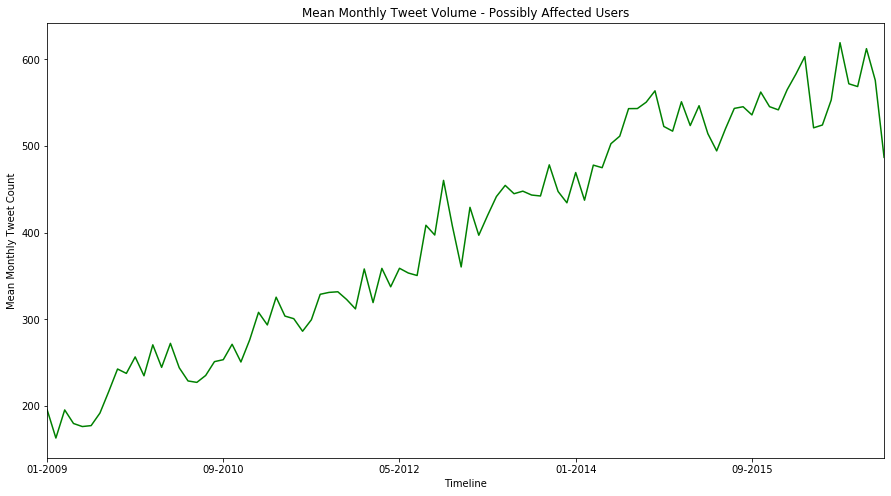

In [25]:
plt.figure()
tweet_countDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Mean Monthly Tweet Volume - Possibly Affected Users')
# plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Tweet Count')
plt.xlabel('Timeline')
# plt.savefig('PAU_graphics/pau_tweetcount.png')
plt.show()

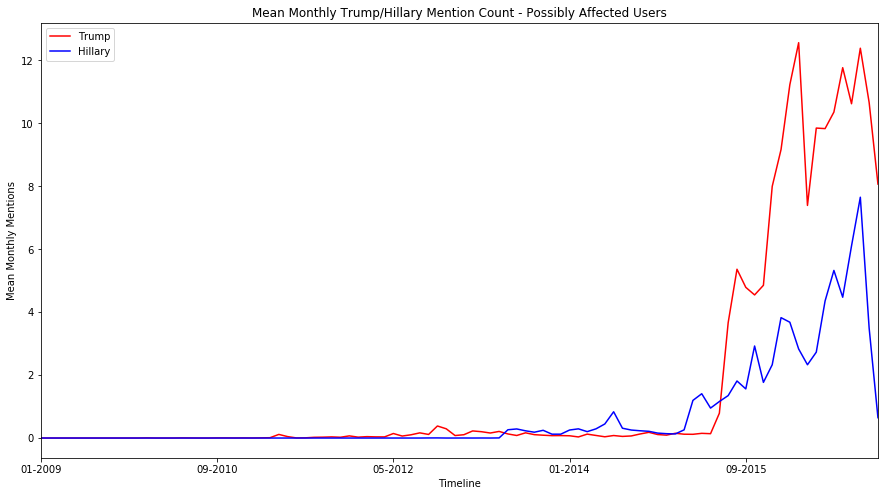

In [26]:
plt.figure()
trump_countDF.mean().plot(kind='line', color='red', figsize=(15,8),title='Mean Monthly Trump/Hillary Mention Count - Possibly Affected Users')
clinton_countDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Mentions')
# plt.savefig('PAU_graphics/pau_mentions.png')
plt.xlabel('Timeline')
plt.show()

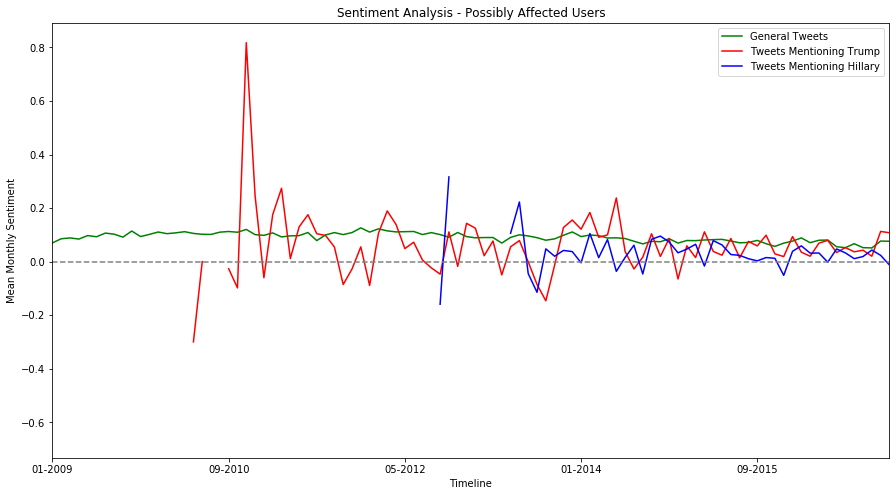

In [27]:
plt.figure()
sentiment_scoresDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Sentiment Analysis - Possibly Affected Users')
trump_sentDF.mean().plot(kind='line', color='red', figsize=(15,8))
clinton_sentDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('General Tweets','Tweets Mentioning Trump','Tweets Mentioning Hillary'))
plt.axhline(0, color="grey", linestyle="--")
plt.ylabel('Mean Monthly Sentiment')
# plt.savefig('PAU_graphics/pau_sentiment.png')
plt.xlabel('Timeline')
plt.show()